# 1, 2

True. Since the probability density of $X_n$ and $Y_n$ become infinitely focus under $X$ and $Y$, so the additivity holds. This is just me thinking intuitively, if you know a rigorous proof somewhere, please let me know. I may try to add a proof myself, later.

# 3

True if $X_n$ and $Y_n$ are independent.

# 4

The statement is false

Let $X^n$ be the sequence of $n$ coin tosses, $X_i$ be the Bernoulli random variable of turning head for each coin toss, so

\begin{align}
\mathbb{E}[X_i] &= p \\
\mathbb{V}[X_i] &= p(1-p) \\
\end{align}

Let the random variable $\bar X$ be 

$$\bar X = \frac{1}{n}\sum_i^n {X_i}$$

According to Problem 1, we have

\begin{align*}
\mathbb{E}[\bar X] &= \mathbb{E}\Big[\frac{1}{n}\sum_i^n X_i \Big] = p \\
\mathbb{V}[\bar X] &= \mathbb{V}\Big[\frac{1}{n}\sum_i^nX_i \Big] = \frac{1}{n^2} \sum_i^n \mathbb{V}[X_i] = \frac{p(1-p)}{n} \\
\end{align*}

According to central limit theorem,

$$\bar X \sim \mathcal{N} \Big(p, \frac{p(1-p)}{n} \Big)$$

Given that heads show up 43 out of 100 times, $n$ = 100, and $\bar X$ = 0.43, so

\begin{align*}
\mathbb{P}[0.33 \le p \le 0.53] 
&= \mathbb{P}[\bar X - 0.1 \le p \le \bar X + 0.1] \\
&= \mathbb{P}[\left|\bar X - p\right| \le 0.1] \\
&= \mathbb{P}[p - 0.1 \le \bar X \le p + 0.1] \\
&= \mathbb{P}\Big[\frac{-0.1}{\sqrt{p(1-p) / n}}  \le \frac{\bar X - p}{\sqrt{p(1-p)/n}} \le \frac{0.1}{\sqrt{p(1-p)/n}}\Big] \\
&= \mathbb{P}\Big[\frac{-1}{\sqrt{p(1-p)}}  \le Z \le \frac{1}{\sqrt{p(1-p)}}\Big] \
\end{align*}

where $Z \sim \mathcal{N}(0, 1)$.

Thus the probability of $p$ within the interval of 0.33 and 0.53 is variable depending on $p$. Such dependency is plotted below,

Text(0.5,0,'p')

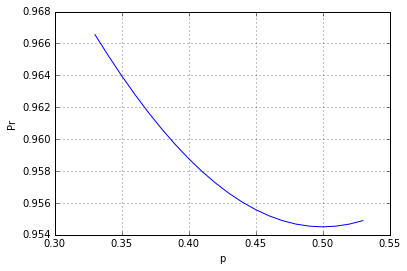

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


def cdf(p):
    factor = 1 / np.sqrt(p * (1 - p))
    return stats.norm.cdf(factor) - stats.norm.cdf(- factor)

ps = np.arange(0.33, 0.53 + 0.01, 0.01)
plt.plot(ps, cdf(ps))

plt.grid()
plt.ylabel('Pr')
plt.xlabel('p')

In [20]:
idx = np.argmin(cdf(ps))
print(ps[idx], cdf(ps)[idx])

0.5000000000000002 0.9544997361036416


So the probability is always above 0.95, and its minimum is 0.954 when $p=0.5$.

**NOTE**: this reads funny since $p$ is unknown, if $p$ is known, then the probability of it within the interval is 1. Please let me know if you think my way of thinking is wrong, and it should've been described in a more intuitive way.

A closely related post is https://math.stackexchange.com/questions/888562/confidence-interval-for-estimating-probability-of-a-biased-coin